# **Pattern Recognition Assignment 3**

In [68]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

## Question 1

In [69]:
df = pd.read_csv('/content/drive/MyDrive/PR/gender_feature_vectors.csv')
df.head(3)

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,0.272529,-0.107907,-0.190014,-0.145586,-0.012682,0.154819,-0.241271,-0.162936,-0.120377,-0.047154,-0.004024,0.010867,0.013803,0.033862,-0.165088,-0.356740,-0.104970,-0.089917,0.163656,-0.138332,0.011188,0.005595,-0.144617,-0.070563,0.089040,0.042198,-0.013146,-0.088541,...,0.176488,0.023528,-0.042136,0.146026,-0.060144,-0.045779,0.005116,-0.040269,-0.146532,0.020204,-0.071422,-0.070934,0.039376,-0.073057,0.013110,0.073191,-0.174984,0.112673,0.050317,-0.087701,-0.033930,0.018559,-0.087492,0.076850,0.160139,-0.359518,0.225189,0.175419,-0.003953,0.142986,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,0.271853,-0.041583,-0.252784,-0.117582,-0.040385,0.112987,-0.199148,-0.059140,-0.138428,-0.128424,0.139366,0.032024,0.092371,0.043215,-0.143541,-0.271580,-0.007330,-0.176620,0.074239,-0.121689,0.007702,0.039026,-0.212572,-0.110950,0.037608,0.048441,-0.049306,-0.044366,...,0.068932,-0.057217,-0.111655,0.211533,-0.086261,0.087350,0.046462,0.012710,-0.140843,-0.009904,-0.077447,-0.016317,0.019141,-0.092818,0.007209,0.017404,-0.177952,0.121269,-0.034220,-0.007996,-0.047971,-0.019876,-0.088064,0.071553,0.130182,-0.311870,0.315533,0.231109,-0.002901,0.161646,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,0.248798,-0.023033,-0.284685,-0.207826,0.078375,0.110781,-0.099561,-0.159526,-0.156689,-0.046377,-0.066865,-0.016259,0.119524,-0.036528,-0.200072,-0.347999,-0.092376,-0.110221,0.003830,-0.072553,-0.037326,0.049584,-0.241518,-0.144820,0.016032,0.116784,-0.058099,-0.026928,...,0.139447,-0.073286,-0.028742,0.176206,0.000778,0.061516,0.151425,0.097024,-0.069615,-0.021548,-0.135799,0.083675,0.152181,-0.062115,0.024492,0.094129,-0.092504,0.125004,-0.017716,-0.031443,0.050664,-0.127573,-0.048483,-0.116371,0.103385,-0.245697,0.202906,0.183545,-0.075050,0.141646,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116


In [70]:
df1 = df.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1)
X = np.array(df1)
print(X.shape)

(800, 128)


In [71]:
def PCA(X):

    mean = np.average(X, axis = 0)

    Z = (X - mean) /  (np.max(X, axis = 0) - np.min(X, axis = 0))
    cov_mat = np.dot(Z.T, Z)

    e_val, e_vec = np.linalg.eigh(cov_mat)
    print('Eigen value shape :', e_val.shape,'Eigen vector shape :', e_vec.shape)

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()
    dummy = 0

    for val in sorted_e_val:
        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]
        dummy +=1

    e_val_sum = np.sum(sorted_e_val)
    thresh = e_val_sum * 0.95

    dummy_sum = 0
    d_dash = 0

    while dummy_sum < thresh:
        dummy_sum += sorted_e_val[d_dash]
        d_dash += 1

    print('New axis count :', d_dash)    
    # print('Sorted Eigen Values:', np.sort(e_val))

    plt.figure(figsize = (55, 13))
    plt.bar([str(i + 1) for i in range(d_dash)], (np.sort(e_val))[-d_dash:])
    plt.title('Eigen Values(E_V) of top' + str(len(e_val)) + 'Principal Components')
    plt.show()

    Z_star = np.dot(Z, sorted_e_vec)

    return Z_star[:,:d_dash]

Eigen value shape : (128,) Eigen vector shape : (128, 128)
New axis count : 57


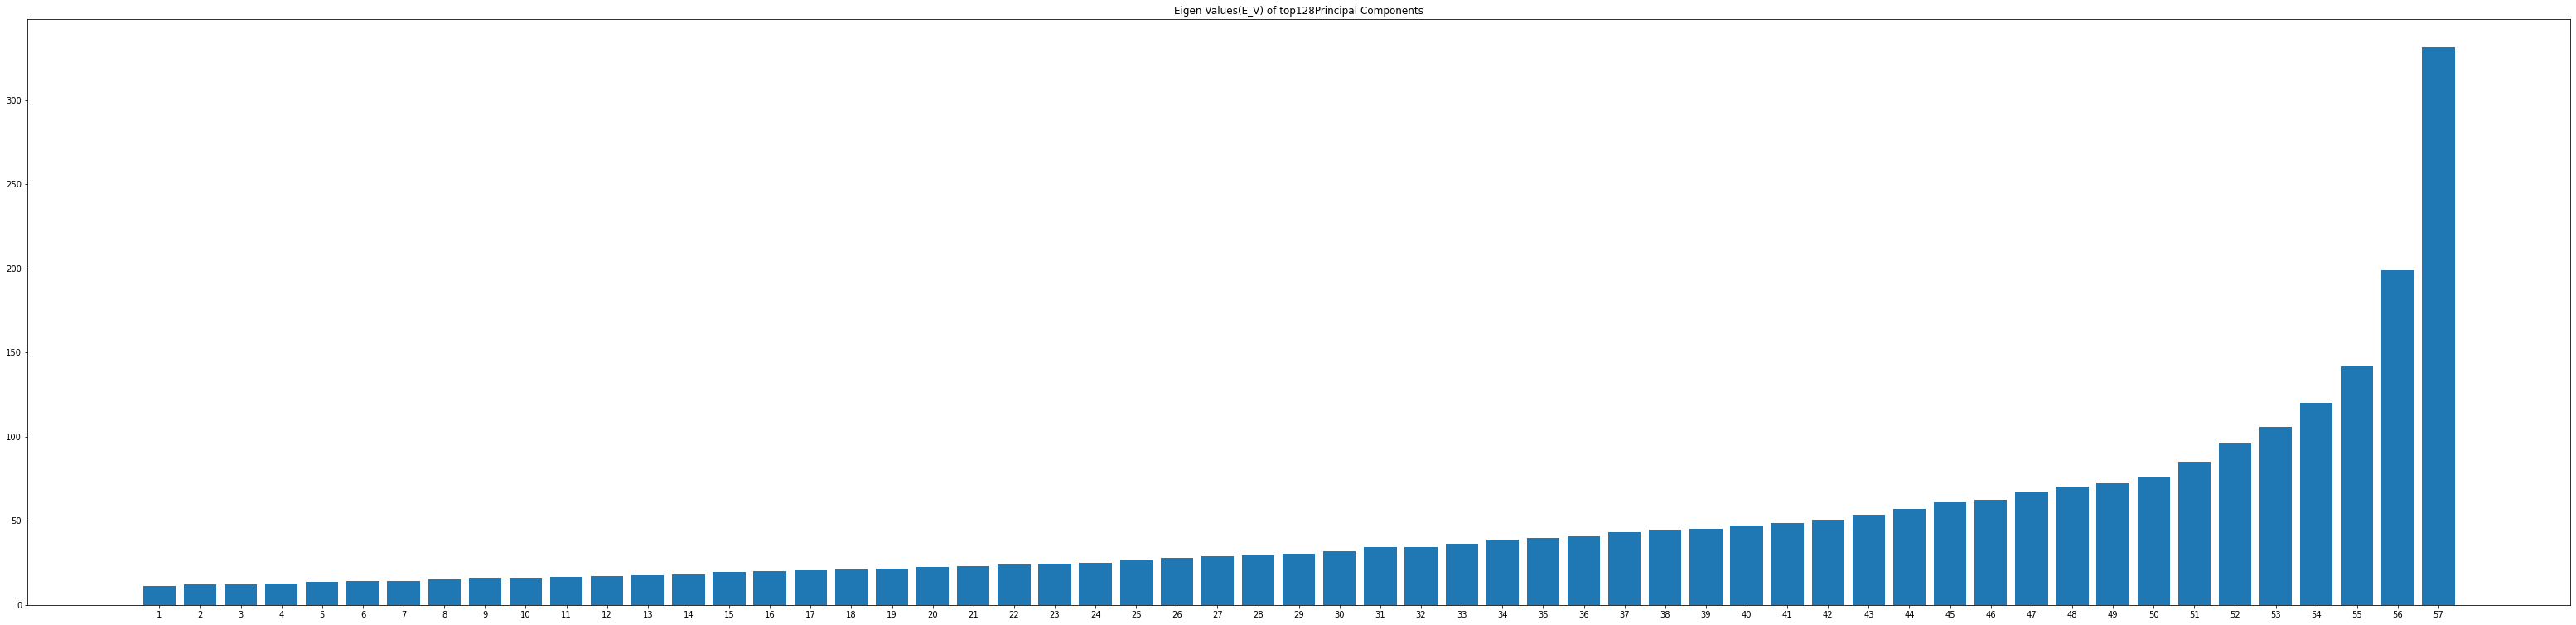

In [72]:
PC_X = PCA(X)

In [73]:
class1 = PC_X[:len(df.loc[df['Unnamed: 1'] == 'male'])]
class2 = PC_X[len(df.loc[df['Unnamed: 1'] == 'male']):]

In [74]:
train1 = class1[10:]
test1 = class1[:10]

train2 = class2[10:]
test2 = class2[:10]

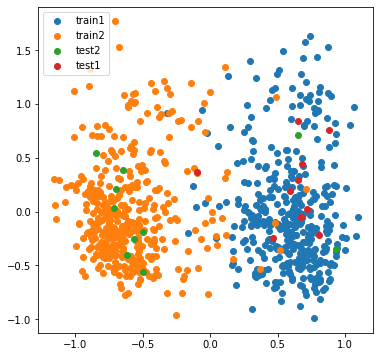

In [75]:
plt.figure(figsize= (6, 6))

plt.scatter(train1[:,0], train1[:,1])
plt.scatter(train2[:,0], train2[:,1])

plt.scatter(test2[:,0], test2[:,1])
plt.scatter(test1[:,0], test1[:,1])

plt.legend(['train1', 'train2', 'test2', 'test1'])
plt.show()

In [76]:
# square root of sum of square of distances

print('Predictions for the male test points:\n')

q1_pred_test1 = []

for samp in test1:

    q1_pred_test1.append(np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))

q1_pred_test1 = np.stack(q1_pred_test1) * 1

print('\n-------------------')
print('\nPredictions for the female test points:\n')

q1_pred_test2 = []

for samp in test2:
    
    q1_pred_test2.append(np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))

q1_pred_test2 = np.stack(q1_pred_test2) * 1

q1_indices_one = q1_pred_test2 == 1
q1_indices_zero = q1_pred_test2 == 0
q1_pred_test2[q1_indices_one] = 0
q1_pred_test2[q1_indices_zero] = 1


Predictions for the male test points:

The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is False
The predition is True
The predition is True

-------------------

Predictions for the female test points:

The predition is False
The predition is False
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True


----------------------------------------------------------------------------------------------------------------------------------------

## Question 2

In [77]:
X0 = X[:len(df.loc[df['Unnamed: 1'] == 'male'])]
X1 = X[len(df.loc[df['Unnamed: 1'] == 'male']):]
print('Shape of class male :', X0.shape, '\nShape of class female :', X1.shape)

Shape of class male : (399, 128) 
Shape of class female : (401, 128)


In [78]:
def LDA(X0, X1, d_dash):

    mean0 = np.average(X0, axis = 0)
    mean1 = np.average(X1, axis = 0)

    # Within class scatter matrix

    Sw = np.zeros((len(mean0), len(mean0)))

    for row in X0:
        subbed = (row - mean0).reshape((len(mean0), 1))
        dotted = np.dot(subbed, subbed.T)
        Sw += dotted    

    for row in X1:
        subbed = (row - mean1).reshape((len(mean1), 1))
        dotted = np.dot(subbed, subbed.T)
        Sw += dotted    


    # Between class scatter matrix

    Sb = np.zeros((len(mean0), len(mean0)))
    subbed = (mean0 - np.average(X, axis = 0)).reshape((len(mean0), 1))
    Sb += len(X0) * np.dot(subbed, subbed.T)

    subbed = (mean1 - np.average(X, axis = 0)).reshape((len(mean1), 1))
    Sb += len(X1) * np.dot(subbed, subbed.T)


    # Eigen Values and Vectors

    e_val, e_vec = np.linalg.eigh(np.dot(np.linalg.inv(Sw), Sb))

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()

    for dummy, val in enumerate(sorted_e_val):

        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]

    new_feat = np.dot(X, sorted_e_vec)

    return new_feat[:,:d_dash]

In [79]:
LD_X = LDA(X0, X1, 1)

In [80]:
class1 = LD_X[:len(df.loc[df['Unnamed: 1'] == 'male'])]
class2 = LD_X[len(df.loc[df['Unnamed: 1'] == 'male']):]

In [81]:
train1 = class1[10:]
test1 = class1[:10]

train2 = class2[10:]
test2 = class2[:10]

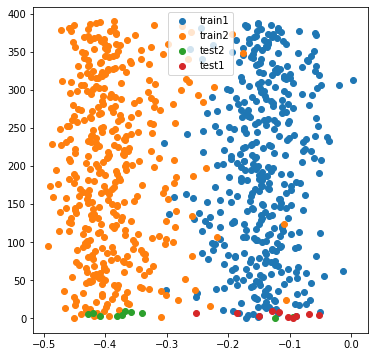

In [82]:
plt.figure(figsize= (6, 6))

plt.scatter(train1[:,0], range(len(train1[:,0])))
plt.scatter(train2[:,0], range(len(train2[:,0])))

plt.scatter(test2[:,0], range(len(test2[:,0])))
plt.scatter(test1[:,0], range(len(test1[:,0])))

plt.legend(['train1', 'train2', 'test2', 'test1'])
plt.show()

In [83]:
# square root of sum of square of distances

print('Predictions for the male test points:\n')

q2_pred_test1 = []

for samp in test1:

    q2_pred_test1.append(np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) < np.sqrt(np.sum(np.square(train2 - samp))))

q2_pred_test1 = np.stack(q2_pred_test1) * 1

print('\n-------------------')
print('\nPredictions for the female test points:\n')

q2_pred_test2 = []

for samp in test2:
    
    q2_pred_test2.append(np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))
    print('The predition is', np.sqrt(np.sum(np.square(train1 - samp))) > np.sqrt(np.sum(np.square(train2 - samp))))

q2_pred_test2 = np.stack(q2_pred_test2) * 1

q2_indices_one = q2_pred_test2 == 1
q2_indices_zero = q2_pred_test2 == 0
q2_pred_test2[q2_indices_one] = 0
q2_pred_test2[q2_indices_zero] = 1


Predictions for the male test points:

The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True

-------------------

Predictions for the female test points:

The predition is False
The predition is False
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True
The predition is True




---



## Question 3

In [84]:
def confusion_matrix(pred, true):
    
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0

    for i in range(len(pred)):
        
        if pred[i] == true[i]:
         
            if pred[i] == 1:
                true_pos += 1
            else:
                true_neg += 1
        else:

            if pred[i] == 1 and true[i] == 0:
                false_pos += 1
            else:
                false_neg += 1

    return true_pos, true_neg, false_pos, false_neg

In [85]:
q1_pred_test = np.concatenate((q1_pred_test1, q1_pred_test2), axis = 0)

q1_orig1 = np.ones(len(q1_pred_test1))
q1_orig2 = np.zeros(len(q1_pred_test2))
q1_orig = np.concatenate((q1_orig1, q1_orig2), axis = 0)

q1_true_pos, q1_true_neg, q1_false_pos, q1_false_neg = confusion_matrix(q1_pred_test, q1_orig)

In [86]:
q1_acc = (q1_true_pos + q1_true_neg)/(q1_true_pos + q1_true_neg + q1_false_pos + q1_false_neg)
q1_prec = (q1_true_pos)/(q1_true_pos + q1_false_pos)
q1_rec = (q1_true_pos)/(q1_true_pos + q1_false_neg)
q1_f1 = 2 * q1_prec * q1_rec / (q1_prec + q1_rec)

print('Question 1 report')
print('Accuracy =', round(q1_acc, 3))
print('Precision =', round(q1_prec, 3))
print('Recall = ', round(q1_rec, 3))
print('F1 Score = ', round(q1_f1, 3))

Question 1 report
Accuracy = 0.85
Precision = 0.818
Recall =  0.9
F1 Score =  0.857


In [87]:
q2_pred_test = np.concatenate((q2_pred_test1, q2_pred_test2), axis = 0)

q2_orig1 = np.ones(len(q2_pred_test1))
q2_orig2 = np.zeros(len(q2_pred_test2))
q2_orig = np.concatenate((q2_orig1, q2_orig2), axis = 0)

q2_true_pos, q2_true_neg, q2_false_pos, q2_false_neg = confusion_matrix(q2_pred_test, q2_orig)

In [88]:
q2_acc = (q2_true_pos + q2_true_neg)/(q2_true_pos + q2_true_neg + q2_false_pos + q2_false_neg)
q2_prec = (q2_true_pos)/(q2_true_pos + q2_false_pos)
q2_rec = (q2_true_pos)/(q2_true_pos + q2_false_neg)
q2_f1 = 2 * q2_prec * q2_rec / (q2_prec + q2_rec)

print('Question 2 report')
print('Accuracy =', round(q2_acc, 3))
print('Precision =', round(q2_prec, 3))
print('Recall = ', round(q2_rec, 3))
print('F1 Score = ', round(q2_f1, 3))

Question 2 report
Accuracy = 0.9
Precision = 0.833
Recall =  1.0
F1 Score =  0.909




---



## Question 4

In [89]:
df1 = pd.read_csv('/content/drive/MyDrive/PR/face.csv')
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,...,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,...,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,...,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,...,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830578,0.830578,0.842975,0.838843,0.838843,0.838843,0.830578,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0.797521,0.801653,0.793388,0.793388,...,0.557851,0.574380,0.595041,0.599174,0.611570,0.623967,0.636364,0.669422,0.681818,0.698347,0.698347,0.714876,0.710744,0.764463,0.756198,0.785124,0.797521,0.739669,0.714876,0.681818,0.619835,0.293388,0.144628,0.152893,0.152893,0.157025,0.148760,0.161157,0.161157,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


Eigen value shape : (4096,) Eigen vector shape : (4096, 4096)
New axis count : 121


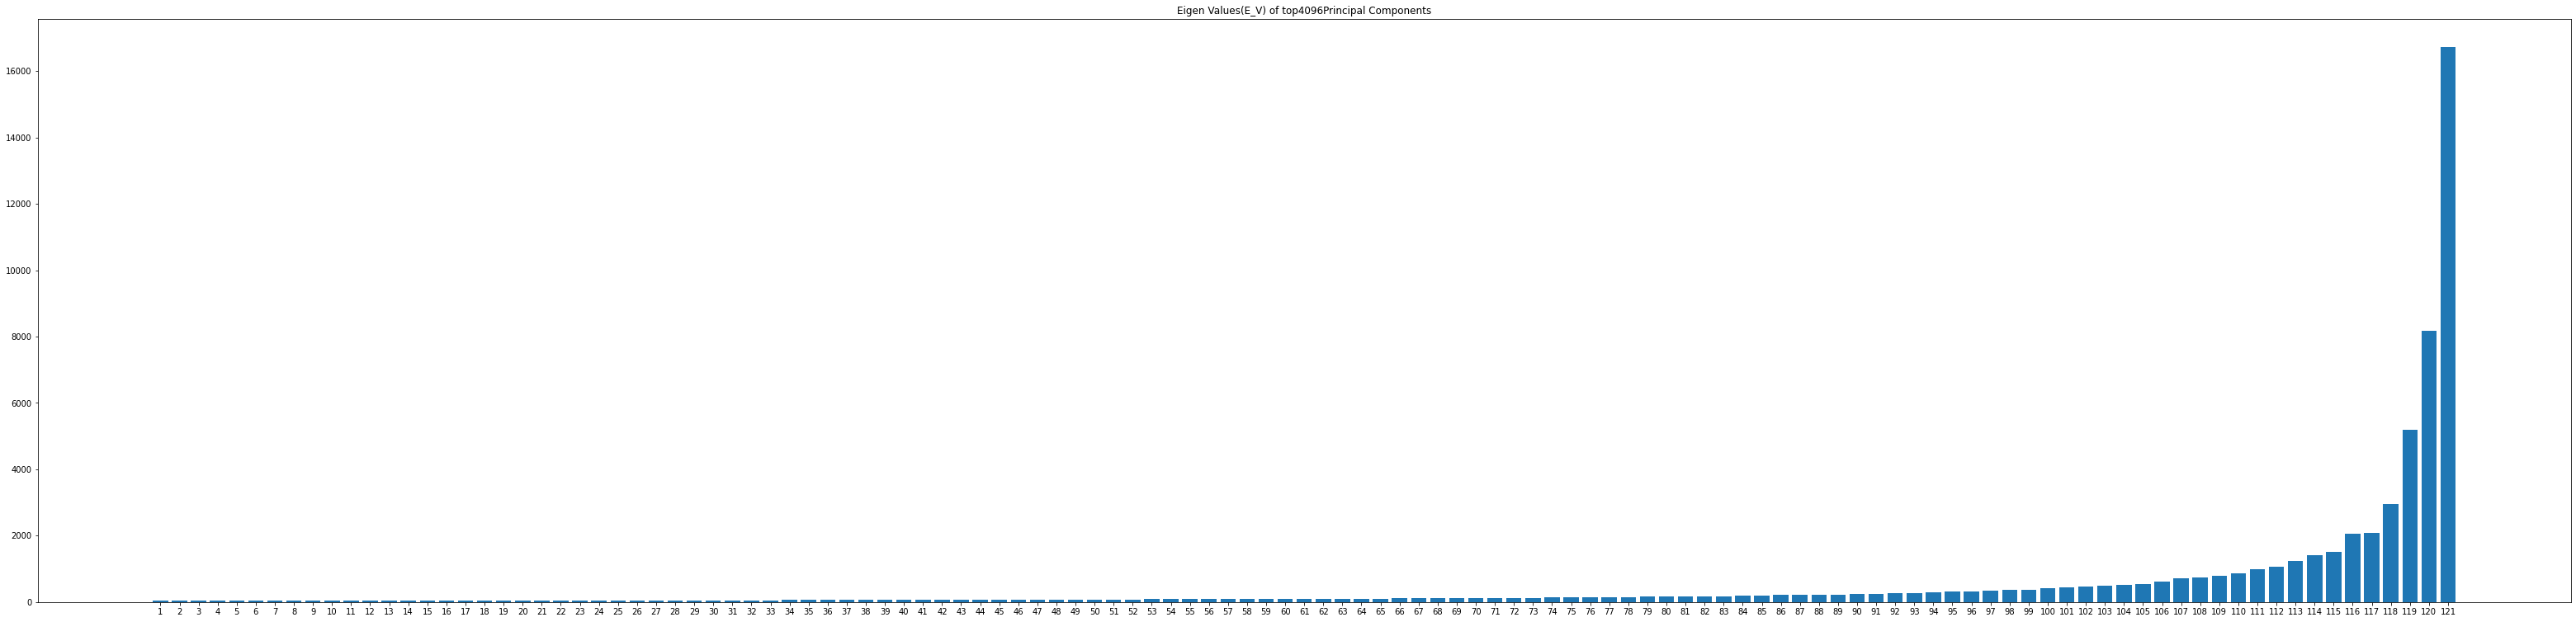

In [90]:
X = np.array(df1.drop('target', axis = 1))

PC_X = PCA(X)

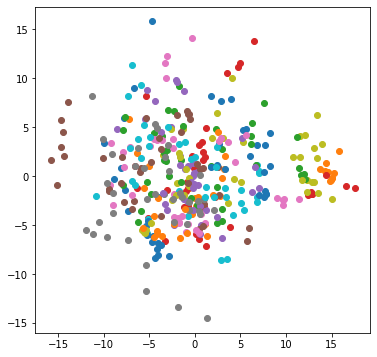

In [91]:
plt.figure(figsize= (6, 6))

for i in range(0, len(PC_X), 10):
    
    plt.scatter(PC_X[i:i+10,0], PC_X[i:i+10,1])

#plt.legend(['train' + str(i) for i in range(len(PC_X))])
plt.show()

In [92]:
test = PC_X[np.arange(0, len(PC_X)) % 10 == 0]
train = PC_X[np.arange(0, len(PC_X)) % 10 != 0]

print('\nShape of train :', train.shape, 'Shape of test :', test.shape)


Shape of train : (360, 121) Shape of test : (40, 121)


In [93]:
result = []
predicted = []

for j,samp in enumerate(test):

    distances = []

    d = np.sum((train - samp)**2, axis = 1)

    for i in range(0, len(d), 9):
        distances.append(np.sum(d[i:i+9]))
    
    result.append(np.argmin(np.stack(distances)) == j)
    predicted.append(np.argmin(np.stack(distances)))
    
    print('Test class->', j, '|', predicted[j], '<-Predicted class')

print('----------------------------------------------')
print('Accuracy :', np.sum(np.stack(result))/len(test))

Test class-> 0 | 17 <-Predicted class
Test class-> 1 | 1 <-Predicted class
Test class-> 2 | 24 <-Predicted class
Test class-> 3 | 3 <-Predicted class
Test class-> 4 | 4 <-Predicted class
Test class-> 5 | 5 <-Predicted class
Test class-> 6 | 6 <-Predicted class
Test class-> 7 | 10 <-Predicted class
Test class-> 8 | 8 <-Predicted class
Test class-> 9 | 24 <-Predicted class
Test class-> 10 | 10 <-Predicted class
Test class-> 11 | 11 <-Predicted class
Test class-> 12 | 12 <-Predicted class
Test class-> 13 | 13 <-Predicted class
Test class-> 14 | 14 <-Predicted class
Test class-> 15 | 23 <-Predicted class
Test class-> 16 | 8 <-Predicted class
Test class-> 17 | 17 <-Predicted class
Test class-> 18 | 18 <-Predicted class
Test class-> 19 | 29 <-Predicted class
Test class-> 20 | 29 <-Predicted class
Test class-> 21 | 21 <-Predicted class
Test class-> 22 | 17 <-Predicted class
Test class-> 23 | 23 <-Predicted class
Test class-> 24 | 24 <-Predicted class
Test class-> 25 | 25 <-Predicted class
Tes



---



## Question 5

In [94]:
old_feat = []
#test = []

for i in range(0, len(X), 10):
    old_feat.append(X[i:i+10])
    # test.append(X[i+9])


In [95]:
def LDA_multiclass(train, d_dash):
    
    mean = []

    for vals in train:
        mean.append(np.average(vals, axis = 0))

    mean = np.stack(mean)

    # Within class scatter matrix

    Sw = np.zeros((len(mean[0]), len(mean[0])))

    for i, vals in enumerate(train):
        for rows in vals:

            subbed = (rows - mean[i]).reshape((len(mean[i]), 1))
            dotted = np.dot(subbed, subbed.T)
            Sw += dotted    

    Sb = np.zeros((len(mean[0]), len(mean[0])))

    for i,m in enumerate(mean):
        subbed = (m - np.average(mean, axis = 0)).reshape((len(m), 1))
        Sb += len(train[i]) * np.dot(subbed, subbed.T)


    e_val, e_vec = np.linalg.eigh(np.dot(np.linalg.inv(Sw), Sb))

    sorted_e_val = np.flip(np.sort(e_val))
    sorted_e_vec = e_vec.copy()

    for dummy, val in enumerate(sorted_e_val):

        ind = np.argmax(e_val == val * 1)
        sorted_e_vec[:,dummy] = e_vec[:,ind]

    new_feat = np.dot(X, sorted_e_vec)

    return new_feat[:,:d_dash]


In [96]:
new_feat = LDA_multiclass(old_feat, 39)

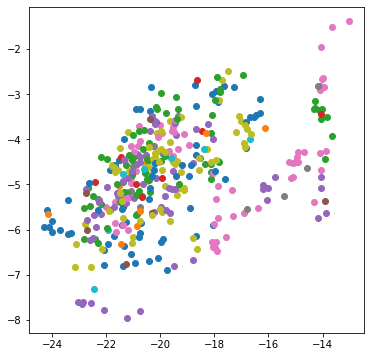

In [97]:
train = []
test = []

plt.figure(figsize= (6, 6))

for i,j in enumerate(range(0, len(new_feat), 10)):
    
    train.append(new_feat[j:j+9]) 
    plt.scatter(train[i][:,0], train[i][:,1])

    test.append(new_feat[j+9])
    plt.scatter(test[i][0], test[i][1])

plt.show()

In [98]:
result = []
predicted = []

for i, samp in enumerate(test):

    distances = []

    for points in train:
        d = np.sum(np.sum((points-samp)**2, axis = 1))
        distances.append(d)

    result.append(np.argmin(np.stack(distances)) == i)
    predicted.append(np.argmin(np.stack(distances)))
    
    print('Test class->', i, '|', predicted[i], '<-Predicted class')


print('----------------------------------------------')
print('Accuracy :', np.sum(np.stack(result))/len(test))


Test class-> 0 | 37 <-Predicted class
Test class-> 1 | 1 <-Predicted class
Test class-> 2 | 22 <-Predicted class
Test class-> 3 | 10 <-Predicted class
Test class-> 4 | 6 <-Predicted class
Test class-> 5 | 5 <-Predicted class
Test class-> 6 | 6 <-Predicted class
Test class-> 7 | 10 <-Predicted class
Test class-> 8 | 8 <-Predicted class
Test class-> 9 | 17 <-Predicted class
Test class-> 10 | 10 <-Predicted class
Test class-> 11 | 11 <-Predicted class
Test class-> 12 | 12 <-Predicted class
Test class-> 13 | 13 <-Predicted class
Test class-> 14 | 14 <-Predicted class
Test class-> 15 | 15 <-Predicted class
Test class-> 16 | 16 <-Predicted class
Test class-> 17 | 17 <-Predicted class
Test class-> 18 | 18 <-Predicted class
Test class-> 19 | 29 <-Predicted class
Test class-> 20 | 20 <-Predicted class
Test class-> 21 | 21 <-Predicted class
Test class-> 22 | 17 <-Predicted class
Test class-> 23 | 23 <-Predicted class
Test class-> 24 | 24 <-Predicted class
Test class-> 25 | 24 <-Predicted class
T